In [1]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()


 ·············


In [ ]:
import sqlutilpy
data = pd.DataFrame(
         sqlutilpy.get('''
         select p.*,
         v.astfit_epochs,v.astfit_params,v.duplicate,v.ref_epoch,v.ra,v.ra_error,v.dec,v.dec_error,v.parallax,v.parallax_error,v.pmra,v.pmra_error,v.pmdec,v.pmdec_error,v.ra_dec_corr,v.ra_parallax_corr,v.ra_pmra_corr,v.ra_pmdec_corr,v.dec_parallax_corr,v.dec_pmra_corr,v.dec_pmdec_corr,v.parallax_pmra_corr,v.parallax_pmdec_corr,v.pmra_pmdec_corr,v.chisq,v.uwe,v.z_n_detections,v.z_n_observations,v.z_n_ambiguous,v.y_n_detections,v.y_n_observations,v.y_n_ambiguous,v.j_n_detections,v.j_n_observations,v.j_n_ambiguous,v.h_n_detections,v.h_n_observations,v.h_n_ambiguous,v.ks_n_detections,v.ks_n_observations,v.ks_n_ambiguous,v.ivw_mean_contemp_j_ks,v.ivw_mean_contemp_h_ks,v.l,v.b,
         m.z_b_med_mag,m.z_b_mean_mag,m.z_b_ivw_mean_mag,m.z_b_std_mag,m.z_b_mad_mag,m.z_b_ivw_err_mag,m.z_n_b_phot,m.y_b_med_mag,m.y_b_mean_mag,m.y_b_ivw_mean_mag,m.y_b_std_mag,m.y_b_mad_mag,m.y_b_ivw_err_mag,m.y_n_b_phot,m.j_b_med_mag,m.j_b_mean_mag,m.j_b_ivw_mean_mag,m.j_b_std_mag,m.j_b_mad_mag,m.j_b_ivw_err_mag,m.j_n_b_phot,m.h_b_med_mag,m.h_b_mean_mag,m.h_b_ivw_mean_mag,m.h_b_std_mag,m.h_b_mad_mag,m.h_b_ivw_err_mag,m.h_n_b_phot,m.ks_b_med_mag,m.ks_b_mean_mag,m.ks_b_ivw_mean_mag,m.ks_b_std_mag,m.ks_b_mad_mag,m.ks_b_ivw_err_mag,m.ks_n_b_phot,
         n.ks_n_epochs,n.ks_mean,n.ks_stdev,n.ks_kurtosis,n.ks_skew,n.ks_p0,n.ks_p1,n.ks_p2,n.ks_p4,n.ks_p5,n.ks_p8,n.ks_p16,n.ks_p25,n.ks_p32,n.ks_p50,n.ks_p68,n.ks_p75,n.ks_p84,n.ks_p92,n.ks_p95,n.ks_p96,n.ks_p98,n.ks_p99,n.ks_p100,n.ks_mad,n.ks_epoch_first,n.ks_epoch_last,n.ks_eta,n.ks_eta_e,n.ks_stetson_in,n.ks_stetson_i,n.ks_stetson_j,n.ks_stetson_k,n.ks_ncross_m10_std,n.ks_ncross_m5_std,n.ks_ncross_m3_std,n.ks_ncross_m2_std,n.ks_ncross_m1_std,n.ks_ncross_0_std,n.ks_ncross_1_std,n.ks_ncross_2_std,n.ks_ncross_3_std,n.ks_ncross_5_std,n.ks_ncross_10_std,n.ks_ncross_m10_mad,n.ks_ncross_m5_mad,n.ks_ncross_m3_mad,n.ks_ncross_m2_mad,n.ks_ncross_m1_mad,n.ks_ncross_0_mad,n.ks_ncross_1_mad,n.ks_ncross_2_mad,n.ks_ncross_3_mad,n.ks_ncross_5_mad,n.ks_ncross_10_mad,n.ks_pspl_mle_t0,n.ks_pspl_mle_te,n.ks_pspl_mle_u0,n.ks_pspl_mle_m0,n.ks_pspl_mle_fs,n.ks_pspl_max_loglike_pspl,n.ks_pspl_mle_constant_mag,n.ks_pspl_max_loglike_constant_mag,n.ks_pspl_mean_loglike_outside_two_te,n.ks_pspl_std_loglike_outside_two_te,n.ks_pspl_mean_loglike_outside_three_te,n.ks_pspl_std_loglike_outside_three_te,n.ks_pspl_count_range_inf_3te_b,n.ks_pspl_count_range_3te_2te_b,n.ks_pspl_count_range_2te_1te_b,n.ks_pspl_count_range_1te_0te_b,n.ks_pspl_count_range_0te_1te_a,n.ks_pspl_count_range_1te_2te_a,n.ks_pspl_count_range_2te_3te_a,n.ks_pspl_count_range_3te_inf_a
         from thomas_molnar.virac2_variable_sources_eaeb as p
         inner join leigh_smith.virac2 as v on p.sourceid=v.sourceid
         inner join leigh_smith.virac2_photstats as m on p.sourceid=m.sourceid
         inner join leigh_smith.virac2_var_indices as n on p.sourceid=n.sourceid''',
                    **config.wsdb_kwargs)
       )

In [72]:
len(data)

2116880

In [73]:
ph = np.linspace(0.,1.,1000)
xx = np.zeros((len(data),len(ph)))
for ii in range(4):
    xx += data['amp_%i'%ii].values[:,np.newaxis]*np.cos(2.*np.pi*(ii+1)*ph[np.newaxis,:]
                                                   +data['phi_%i'%ii].values[:,np.newaxis])
data['ks_model_amplitude']=np.max(xx,axis=1)-np.min(xx,axis=1)

def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['class']=='EA/EB')|(var_in['class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['class']=='EA/EB')|(var_in['class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['class']=='EW']*=2
    
    return period_out
    
data['period'] = period_fix(data)

In [252]:
import sys
sys.path.append('../../../../')
from virac_utils import cm_gaia

gaia = cm_gaia(data, epoch=2014.0, cm_radius=0.5, use_pm=True)

In [253]:
gaia_columns = ['source_id','ra','dec','parallax','pmra','pmdec',
                'parallax_error','pmra_error','pmdec_error',
                'parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr',
                'phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag',
                'ruwe']

for c in gaia_columns:
    data['gaia_edr3_'+c] = gaia[c]
data['virac2_gedr3_sep'] = gaia['q3c_dist']
data['ebv_schlegel'] = gaia['ebv']
data['ebv_schlegel'] = gaia['ebv']

In [76]:
dataF = data.copy()

In [257]:
def relabel_table(data):
    
    col32_save = [
        'amp_0', 'amp_1', 'amp_2', 'amp_3', 
        'amp_double_0', 'amp_double_1', 'amp_double_2', 'amp_double_3', 
        'amplitude', 'beyondfrac', 'delta_loglik',  'log10_fap',
        'lsq_period_error', 'max_pow', 'max_phase_lag', 'pow_mean_disp', 'time_lag_mean',
        'phi_0','phi_1','phi_2','phi_3',
        'phi_double_0','phi_double_1','phi_double_2','phi_double_3',           
        'peak_ratio_model', 'peak_ratio_data',
        'jk_col','hk_col','prob', 'prob_1st_stage',
        'z_scale','z_model','y_scale','y_model','j_scale','j_model','h_scale','h_model',
        'ks_model_amplitude'
    ]

    save_cols_types = dict(zip(col32_save,[np.float32]*len(col32_save)))
    data = data.astype(save_cols_types)
    save_cols_types = {'n_epochs':np.int16, 'lsq_nterms':np.int16 }
    data = data.astype(save_cols_types)
    
    for c in data.columns[data.columns.str.contains('pspl')]:
        del data[c]
    for c in data.columns[data.columns.str.contains('ncross')]:
        del data[c]
    data = data.rename(columns={c:c+'_factor' for c in data.columns[data.columns.str.contains('_scale')]})
    data = data.rename(columns={ii+'_model':ii+'_rms_ks_rms_ratio' for ii in ['z','y','j','h']})
    for s in ['phi','amp','phi_double','amp_double']:
        for ii in [4,3,2,1]:
            data = data.rename(columns={s+'_%i'%(ii-1):'lsq_'+s+'_%i'%ii})
    data = data.rename(columns={'jk_col':'j_ks_0', 'hk_col':'h_ks_0'})
    del data['duplicate']
    del data['ks_mean']
    del data['astfit_params']
    data = data.rename(columns = {c: '_'.join(c.split('_b_')) 
                                 for c in data.columns[data.columns.str.contains('_b_')]})
    data = data.rename(columns = {'peak_ratio_model': 'ks_consec_minimum_ratio_model',
                                  'peak_ratio_data': 'ks_consec_minimum_ratio_data'})
    data = data.rename(columns={'amplitude':'ks_amplitude',
                                'chisq':'astfit_chisq',
                                'uwe':'astfit_uwe',
                                'delta_loglik':'delta_logl_lsq_const',
                                'beyondfrac':'ks_frac_detections_outside_1sigma',
                                'max_pow':'lombscargle_max_pow',
                                'max_phase_lag':'ks_phasediff_max',
                                'time_lag_mean':'ks_phasediff_max_dev_std_ratio',
                                'pow_mean_disp':'lombscargle_pow_max_dev_std_ratio',
                                'n_epochs':'ks_lsq_n_epochs',
                                'ks_n_epochs':'ks_varstats_n_epochs',
                                'ks_stdev':'ks_std_varstats',
                                'log10_fap':'log10_lombscargle_fap'})
    s = data['period'].values
    del data['period']
    data.insert(3, 'period', s)
    s = data['ks_model_amplitude'].values
    del data['ks_model_amplitude']
    data.insert(5, 'ks_lsq_amplitude', s)
    
    for ii in range(1,5):
        s = data['lsq_phi_%i'%ii].values
        del data['lsq_phi_%i'%ii]
        data.insert(9+ii, 'lsq_phi_%i'%ii, s)
    for ii in range(1,5):
        s = data['lsq_phi_double_%i'%ii].values
        del data['lsq_phi_double_%i'%ii]
        data.insert(17+ii, 'lsq_phi_double_%i'%ii, s)
    for ii in ['lsq_period', 'lsq_period_error', 'lsq_nterms'][::-1]:
        s = data[ii].values
        del data[ii]
        data.insert(6, ii, s)
    for ii in ['ra','dec','l','b'][::-1]:
        s = data[ii].values
        del data[ii]
        data.insert(4, ii, s)
    
    data.insert(51,'ejk_rc',data['j_ivw_mean_mag']-data['ks_ivw_mean_mag']-data['j_ks_0'])
    
    data.insert(52,'ehk_rc',data['h_ivw_mean_mag']-data['ks_ivw_mean_mag']-data['h_ks_0'])
            
    del data['j_ks_0']
    del data['h_ks_0']
        
    return data

In [258]:
dataC = relabel_table(data)

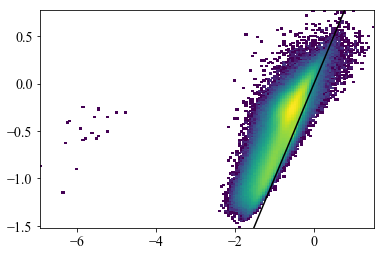

In [167]:
plt.hist2d(np.log10(dataC['ks_lsq_amplitude']),np.log10(dataC['ks_p95']-dataC['ks_p5']),bins=150,norm=LogNorm());
xx = np.linspace(0.01,10.)
plt.plot(np.log10(xx),np.log10(xx),color='k')

In [169]:
import sys
sys.path.append('../../../../')
from virac_utils import wsdb_upload_kwargs, wsdb_kwargs

In [259]:
def fmtr(data,s,chunk):
    if s=='class':
        return data['class'].values.astype(str)[chunk[0]:chunk[1]]
    else:
        return data[s].values[chunk[0]:chunk[1]]

In [260]:
chunk = [0,500000]
sqlutilpy.upload('virac2_variables',
                 [fmtr(dataC,s,chunk) for s in dataC.keys()],
                 dataC.keys(),
                 **wsdb_upload_kwargs)

In [ ]:
chunk = [500000,1000000]
sqlutilpy.upload('virac2_variables',
                 [fmtr(dataC,s,chunk) for s in dataC.keys()],
                 dataC.keys(),createTable=False,
                 **wsdb_upload_kwargs)
chunk = [1000000,1500000]
sqlutilpy.upload('virac2_variables',
                 [fmtr(dataC,s,chunk) for s in dataC.keys()],
                 dataC.keys(),createTable=False,
                 **wsdb_upload_kwargs)
chunk = [1500000,2000000]
sqlutilpy.upload('virac2_variables',
                 [fmtr(dataC,s,chunk) for s in dataC.keys()],
                 dataC.keys(),createTable=False,
                 **wsdb_upload_kwargs)
chunk = [2000000,2500000]
sqlutilpy.upload('virac2_variables',
                 [fmtr(dataC,s,chunk) for s in dataC.keys()],
                 dataC.keys(),createTable=False,
                 **wsdb_upload_kwargs)

In [46]:
data_full = sqlutilpy.get('''select sourceid from thomas_molnar.virac2_variable_sources_eaeb;''', 
                         **wsdb_kwargs)

In [50]:
len(data_full['sourceid'])

2136376

In [58]:
joint=pd.merge(pd.DataFrame(data_full), data[['sourceid','ks_b_ivw_mean_mag']],how='left')

In [64]:
np.count_nonzero(np.isnan(joint['ks_b_ivw_mean_mag']))+len(data)

2136376

In [75]:
joint['sourceid'][np.isnan(joint['ks_b_ivw_mean_mag'])].to_csv('missing_sourceid_for_leigh.dat',index=False)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [78]:
np.count_nonzero(np.isnan(joint['ks_b_ivw_mean_mag']))

19496

## missing sources

In [230]:
missing_s = pd.read_csv('missing_sourceid_for_leigh.dat',names=['sid'])

In [231]:
import sqlutilpy
missing_var_indices=pd.DataFrame(
    sqlutilpy.get('''select n.ks_n_epochs,n.ks_mean,n.ks_stdev,n.ks_kurtosis,n.ks_skew,n.ks_p0,n.ks_p1,n.ks_p2,n.ks_p4,n.ks_p5,n.ks_p8,n.ks_p16,n.ks_p25,n.ks_p32,n.ks_p50,n.ks_p68,n.ks_p75,n.ks_p84,n.ks_p92,n.ks_p95,n.ks_p96,n.ks_p98,n.ks_p99,n.ks_p100,n.ks_mad,n.ks_epoch_first,n.ks_epoch_last,n.ks_eta,n.ks_eta_e,n.ks_stetson_in,n.ks_stetson_i,n.ks_stetson_j,n.ks_stetson_k,n.ks_ncross_m10_std,n.ks_ncross_m5_std,n.ks_ncross_m3_std,n.ks_ncross_m2_std,n.ks_ncross_m1_std,n.ks_ncross_0_std,n.ks_ncross_1_std,n.ks_ncross_2_std,n.ks_ncross_3_std,n.ks_ncross_5_std,n.ks_ncross_10_std,n.ks_ncross_m10_mad,n.ks_ncross_m5_mad,n.ks_ncross_m3_mad,n.ks_ncross_m2_mad,n.ks_ncross_m1_mad,n.ks_ncross_0_mad,n.ks_ncross_1_mad,n.ks_ncross_2_mad,n.ks_ncross_3_mad,n.ks_ncross_5_mad,n.ks_ncross_10_mad,n.ks_pspl_mle_t0,n.ks_pspl_mle_te,n.ks_pspl_mle_u0,n.ks_pspl_mle_m0,n.ks_pspl_mle_fs,n.ks_pspl_max_loglike_pspl,n.ks_pspl_mle_constant_mag,n.ks_pspl_max_loglike_constant_mag,n.ks_pspl_mean_loglike_outside_two_te,n.ks_pspl_std_loglike_outside_two_te,n.ks_pspl_mean_loglike_outside_three_te,n.ks_pspl_std_loglike_outside_three_te,n.ks_pspl_count_range_inf_3te_b,n.ks_pspl_count_range_3te_2te_b,n.ks_pspl_count_range_2te_1te_b,n.ks_pspl_count_range_1te_0te_b,n.ks_pspl_count_range_0te_1te_a,n.ks_pspl_count_range_1te_2te_a,n.ks_pspl_count_range_2te_3te_a,n.ks_pspl_count_range_3te_inf_a
    from leigh_smith.virac2_var_indices as n where sourceid in (%s)'''%(
        ','.join(['%i'%i for i in missing_s['sid']])),**config.wsdb_kwargs))

In [232]:
import sqlutilpy
missing_photstats=pd.DataFrame(
    sqlutilpy.get('''select m.z_b_med_mag,m.z_b_mean_mag,m.z_b_ivw_mean_mag,m.z_b_std_mag,m.z_b_mad_mag,m.z_b_ivw_err_mag,m.z_n_b_phot,m.y_b_med_mag,m.y_b_mean_mag,m.y_b_ivw_mean_mag,m.y_b_std_mag,m.y_b_mad_mag,m.y_b_ivw_err_mag,m.y_n_b_phot,m.j_b_med_mag,m.j_b_mean_mag,m.j_b_ivw_mean_mag,m.j_b_std_mag,m.j_b_mad_mag,m.j_b_ivw_err_mag,m.j_n_b_phot,m.h_b_med_mag,m.h_b_mean_mag,m.h_b_ivw_mean_mag,m.h_b_std_mag,m.h_b_mad_mag,m.h_b_ivw_err_mag,m.h_n_b_phot,m.ks_b_med_mag,m.ks_b_mean_mag,m.ks_b_ivw_mean_mag,m.ks_b_std_mag,m.ks_b_mad_mag,m.ks_b_ivw_err_mag,m.ks_n_b_phot
         from leigh_smith.virac2_var_photstats as m where sourceid in (%s)'''%(
        ','.join(['%i'%i for i in missing_s['sid']])),**config.wsdb_kwargs))

In [233]:
import sqlutilpy
missing_virac2=pd.DataFrame(
    sqlutilpy.get('''select 
    v.astfit_epochs,v.astfit_params,v.duplicate,v.ref_epoch,v.ra,v.ra_error,v.dec,v.dec_error,v.parallax,v.parallax_error,v.pmra,v.pmra_error,v.pmdec,v.pmdec_error,v.ra_dec_corr,v.ra_parallax_corr,v.ra_pmra_corr,v.ra_pmdec_corr,v.dec_parallax_corr,v.dec_pmra_corr,v.dec_pmdec_corr,v.parallax_pmra_corr,v.parallax_pmdec_corr,v.pmra_pmdec_corr,v.chisq,v.uwe,v.z_n_detections,v.z_n_observations,v.z_n_ambiguous,v.y_n_detections,v.y_n_observations,v.y_n_ambiguous,v.j_n_detections,v.j_n_observations,v.j_n_ambiguous,v.h_n_detections,v.h_n_observations,v.h_n_ambiguous,v.ks_n_detections,v.ks_n_observations,v.ks_n_ambiguous,v.ivw_mean_contemp_j_ks,v.ivw_mean_contemp_h_ks,v.l,v.b
from leigh_smith.virac2 as v where sourceid in (%s)'''%(
        ','.join(['%i'%i for i in missing_s['sid']])),**config.wsdb_kwargs))

In [234]:
import sqlutilpy
missing_thomas=pd.DataFrame(
    sqlutilpy.get('''select 
    * from thomas_molnar.virac2_variable_sources_eaeb where sourceid in (%s)'''%(
        ','.join(['%i'%i for i in missing_s['sid']])),**config.wsdb_kwargs))

In [235]:
len(missing_photstats), len(missing_var_indices), len(missing_virac2), len(missing_thomas)

(19496, 19496, 19496, 19496)

In [236]:
missing_classif = pd.read_csv('/local/scratch_2/jls/virac_classifier/results/edr3_EAEB/variables_reclassified_missingsources.csv')

In [241]:
missing_data = pd.concat([missing_thomas, missing_virac2, missing_photstats, missing_var_indices], axis=1)
missing_data['class']=missing_classif['class']
missing_data['prob']=missing_classif['prob']

In [242]:
ph = np.linspace(0.,1.,1000)
xx = np.zeros((len(missing_data),len(ph)))
for ii in range(4):
    xx += missing_data['amp_%i'%ii].values[:,np.newaxis]*np.cos(2.*np.pi*(ii+1)*ph[np.newaxis,:]
                                                   +missing_data['phi_%i'%ii].values[:,np.newaxis])
missing_data['ks_model_amplitude']=np.max(xx,axis=1)-np.min(xx,axis=1)

def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['class']=='EA/EB')|(var_in['class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['class']=='EA/EB')|(var_in['class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['class']=='EW']*=2
    
    return period_out
    
missing_data['period'] = period_fix(missing_data)

In [262]:
missing_gaia = cm_gaia(missing_data, epoch=2014.0, cm_radius=0.5, use_pm=True)
gaia_columns = ['source_id','ra','dec','parallax','pmra','pmdec',
                'parallax_error','pmra_error','pmdec_error',
                'parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr',
                'phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag',
                'ruwe']

for c in gaia_columns:
    missing_data['gaia_edr3_'+c] = missing_gaia[c]
missing_data['virac2_gedr3_sep'] = missing_gaia['q3c_dist']
missing_data['ebv_schlegel'] = missing_gaia['ebv']
missing_data['ebv_schlegel'] = missing_gaia['ebv']

In [245]:
missing_data = relabel_table(missing_data)

In [265]:
len(missing_data)+len(dataC)

2136376

In [263]:
len(missing_data.columns), len(dataC.columns)

(175, 175)

In [264]:
len(data_full['sourceid'])

NameError: name 'data_full' is not defined

In [101]:
len(data_full['sourceid'])-len(missing_data)-len(data)

0

In [266]:
sqlutilpy.upload('virac2_variables',
                 [fmtr(missing_data,s,[0,100000]) for s in missing_data.keys()],
                 missing_data.keys(),createTable=False,
                 **wsdb_upload_kwargs)

In [284]:
from astropy.coordinates import SkyCoord
import astropy.units as u
vv = SkyCoord(ra=dataC['ra'].values*u.deg,dec=dataC['dec'].values*u.deg)
gg = SkyCoord(ra=dataC['gaia_edr3_ra'].values*u.deg,dec=dataC['gaia_edr3_dec'].values*u.deg)

/data/jls/python3.5/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/data/jls/python3.5/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/data/jls/python3.5/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/data/jls/python3.5/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


In [285]:
q3c__p=vv[dataC['gaia_edr3_dec'].values>-1000].separation(gg[dataC['gaia_edr3_dec'].values>-1000]).arcsec

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [286]:
q3c__=dataC['virac2_gedr3_sep'].values[dataC['gaia_edr3_dec'].values>-1000]

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


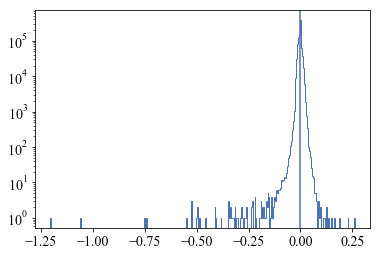

In [292]:
plt.hist(q3c__-q3c__p,bins=350,histtype='step');
plt.semilogy()
plt.axvline(0.)